## Business Case: Build regression models to predict car price based on various features given:
## Task: Car Price Dataset


### Importing Necessary Libraries

In [1]:
#Importthe libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

#importing metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#loading the dataset
df=pd.read_csv("CarPrice.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape #there are 205 rows and 26 columns

(205, 26)

##### There are 205 rows and 26 columns in the dataset

In [5]:
df.info() #there are no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Thus we see there are no null values in the dataset

In [6]:
df.describe() 

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


There are 205 observations, with mean pcar price as 13276.71 and max value as 45400 and min value as 5118

# Exploratory Data Analysis

#### Dealing with  Categorical Features

In [7]:
#separating out categorical features through a function
cat_feat=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_feat)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


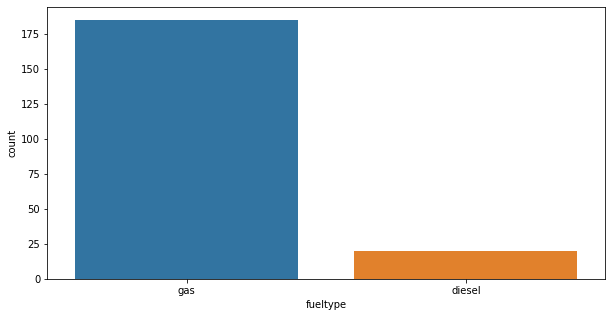

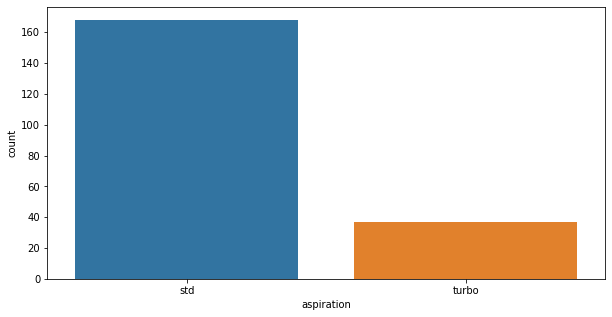

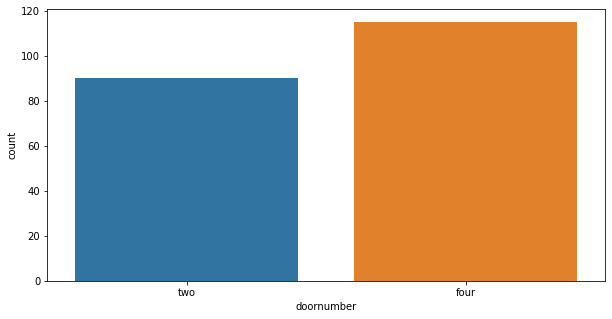

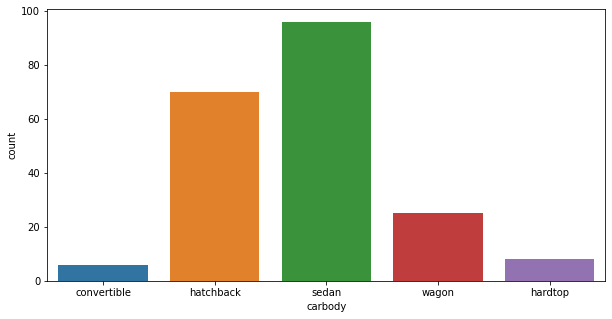

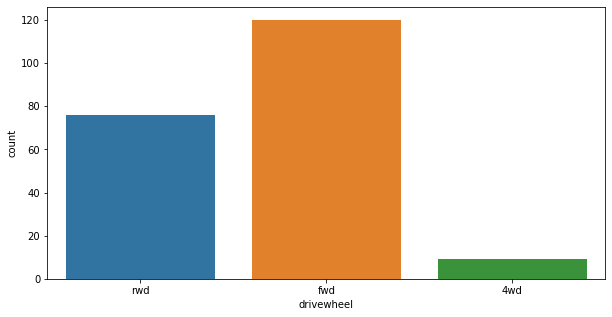

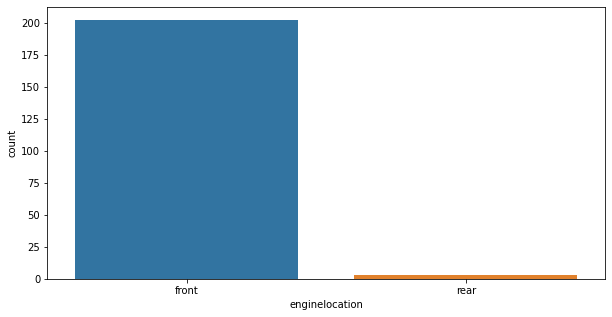

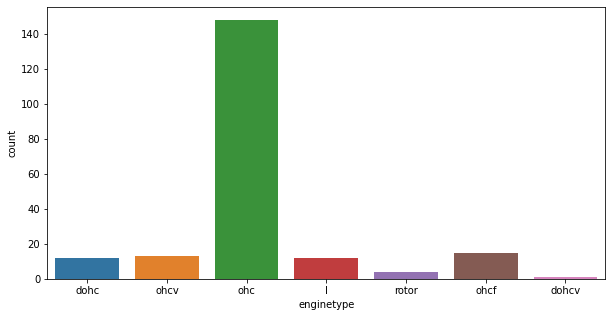

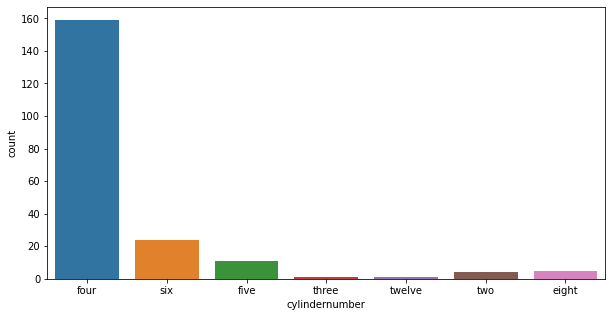

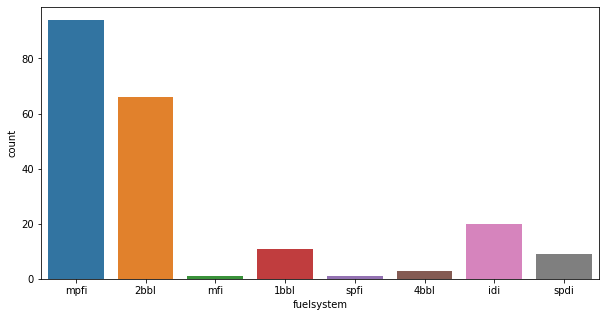

In [8]:
cat_feat1=[feature for feature in cat_feat if len(df[feature].unique())<10]
for feature in cat_feat1 :
    plt.figure(figsize = (10, 5))
    sns.countplot(df[feature])
    plt.show()

#### Numerical Variables 

In [9]:
#numerical features in the dataset
num_feat=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_feat)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


### Plotting Numerical Variables

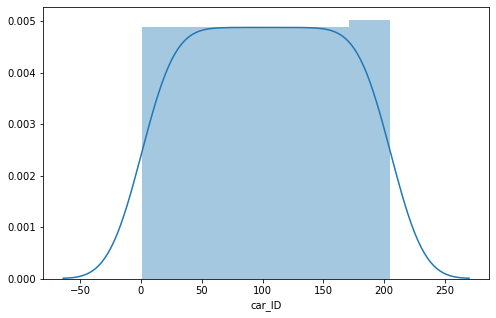

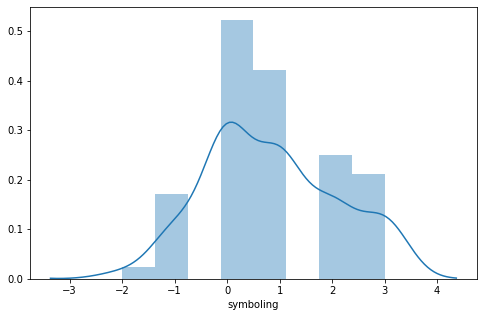

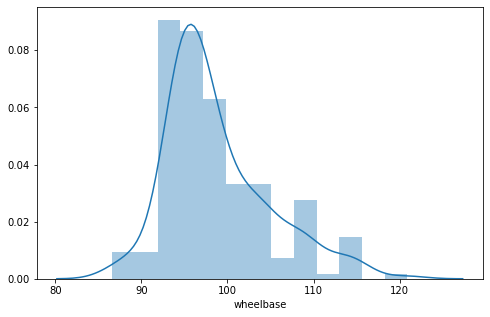

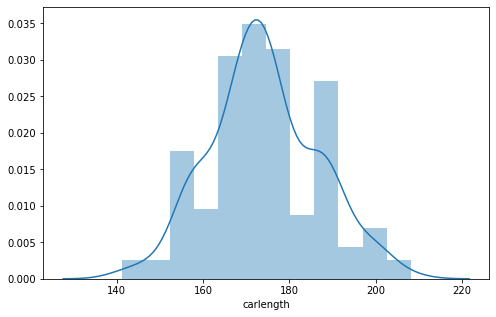

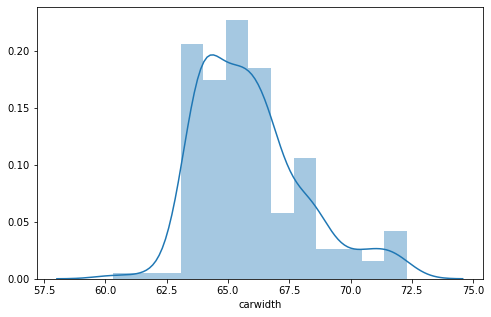

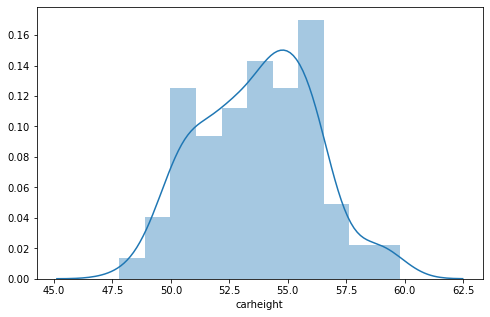

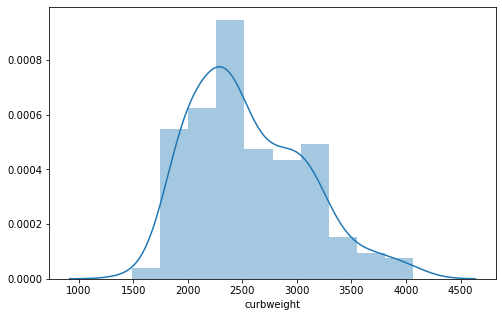

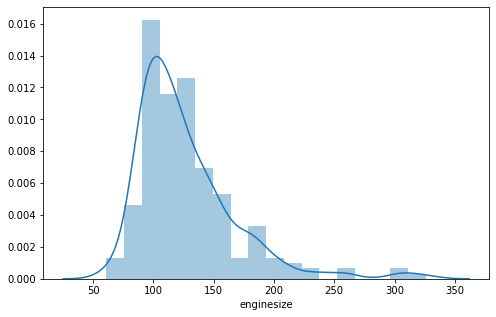

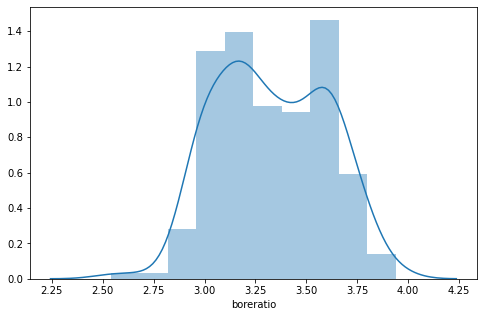

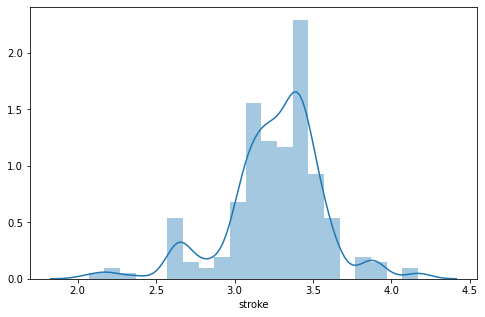

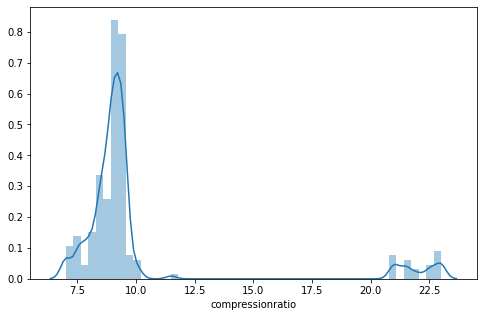

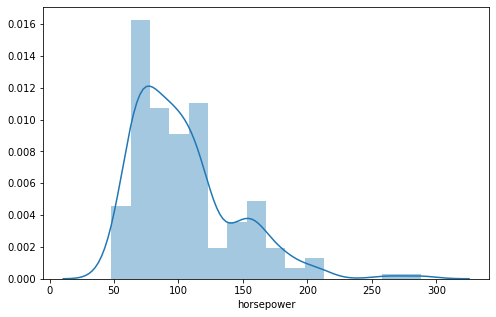

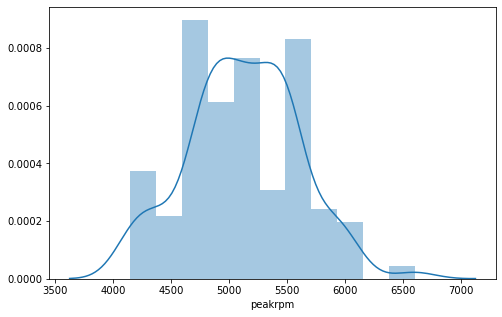

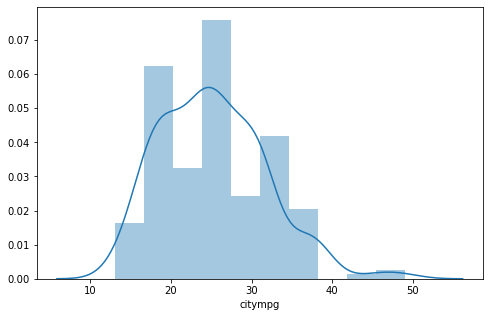

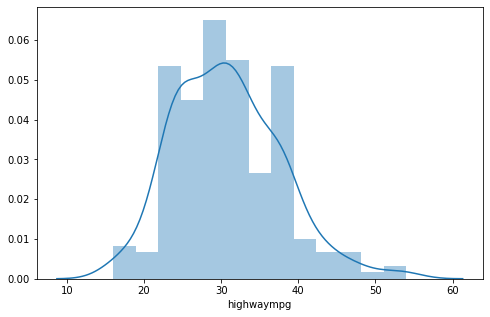

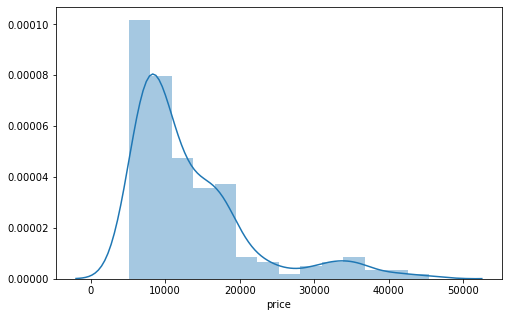

In [10]:
num_feat=[feature for feature in num_feat ]
for feature in num_feat :
    plt.figure(figsize = (8, 5))
    sns.distplot(df[feature],hist=True)
    plt.show()

#### Plotting our Target Variable : Price

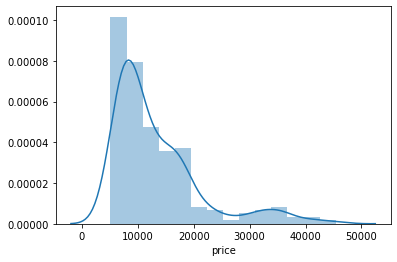

In [11]:
#Distribution of car prices
sns.distplot(df['price'],hist=True)

#### Plotting Categorical Variables VS Target Variable[Price]

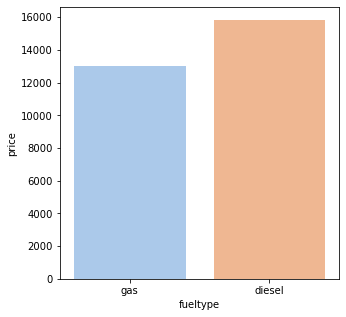

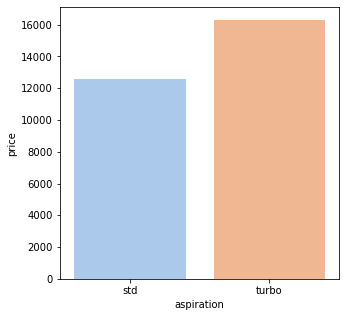

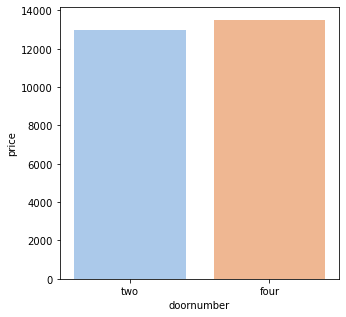

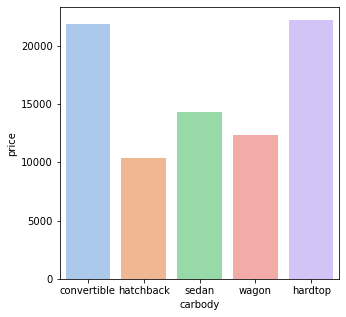

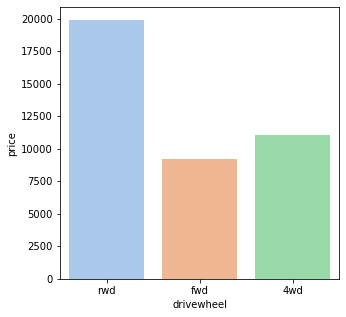

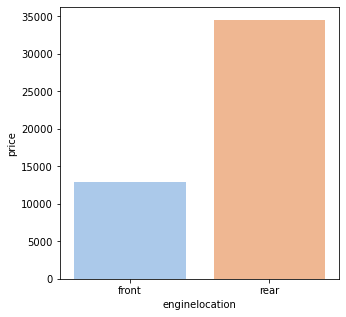

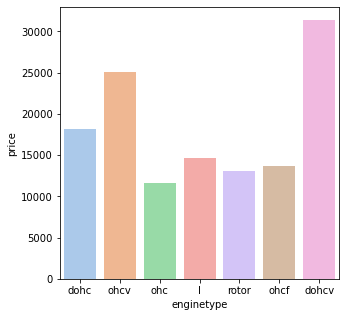

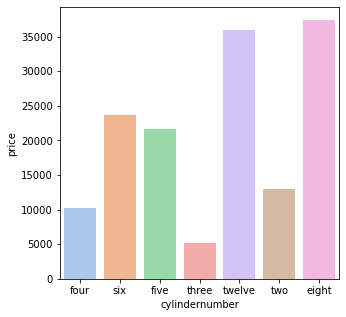

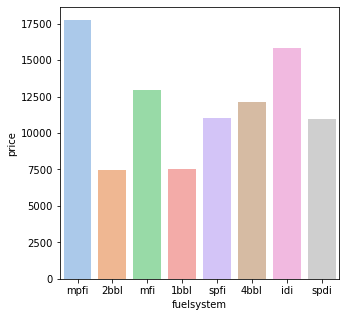

In [12]:
#comparing various  categorical features based on the price of cars

for feature in cat_feat1:
    plt.figure(figsize = (5, 5))
    sns.barplot(x=df[feature],y=df['price'],ci=None,palette='pastel')
    plt.show()

### Plotting numerical VS Target Variable[Price]

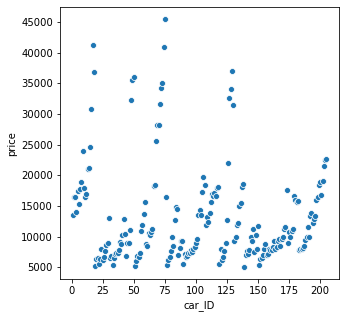

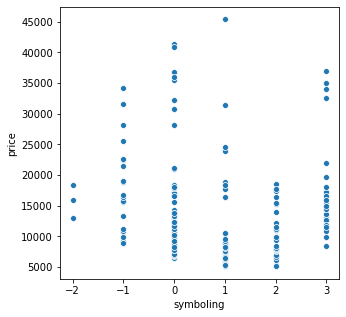

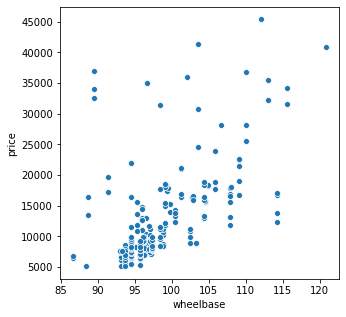

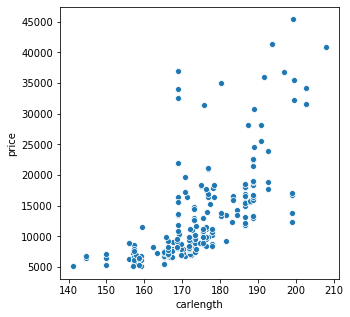

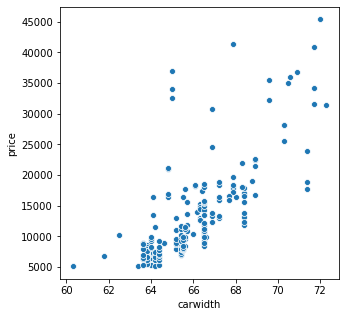

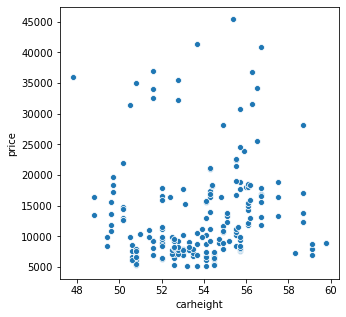

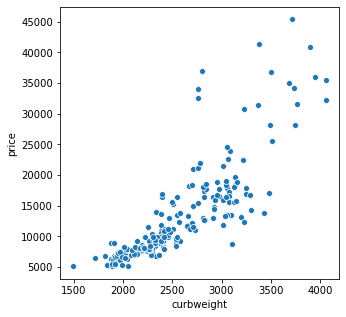

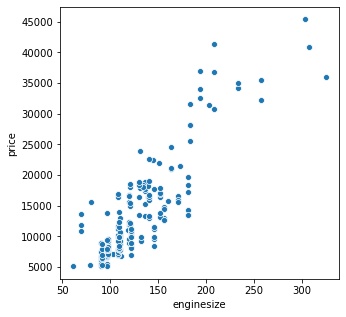

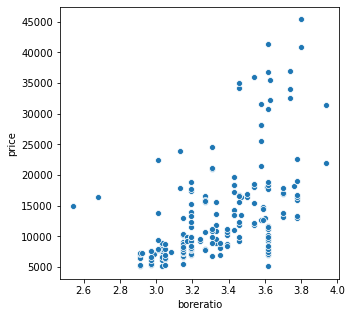

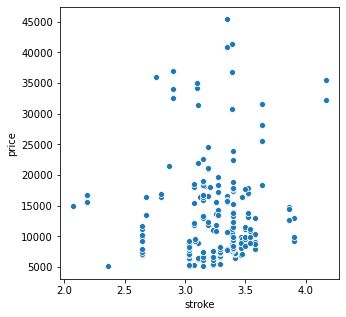

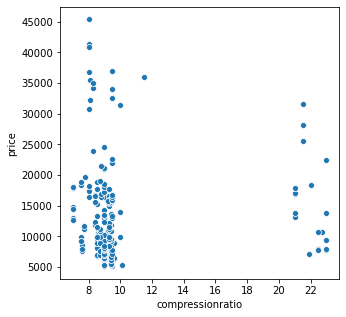

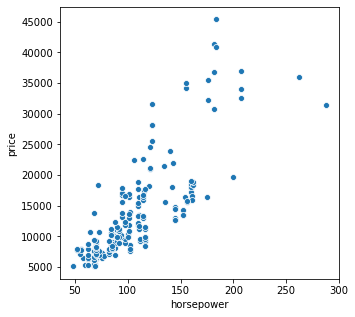

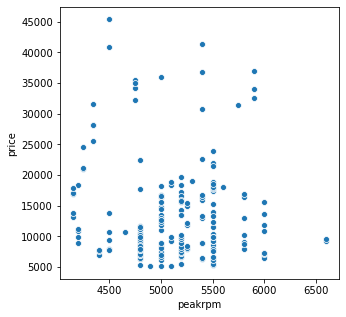

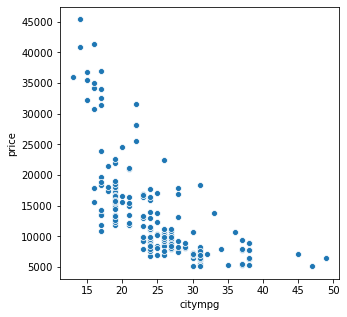

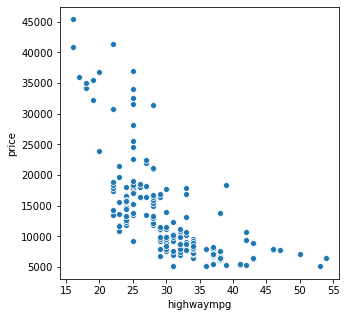

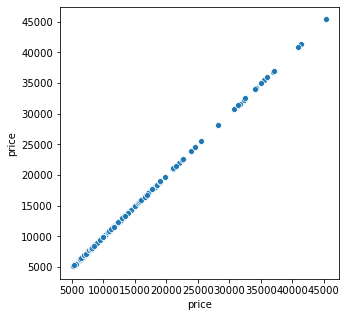

In [13]:
for feature in num_feat:
    plt.figure(figsize = (5, 5))
    sns.scatterplot(x=df[feature],y=df['price'],ci=None,palette='pastel')
    plt.show()

### Observations 

1. Cars using diesel are costlier compared to those using gas 
2. Cars having turbo and having four doors are costlier
3. Car bodies those are convertible and hardtop are costlier
4. Cars having their engine location in the rear end are costlier.
5. Car prices vary according to the engine type 
6. Car prices tend to increase with the increase in the engine number.
7. Cars with the fuel system 'mpfi' has highest price followed by other types 

#### Heatmap to check the correlation

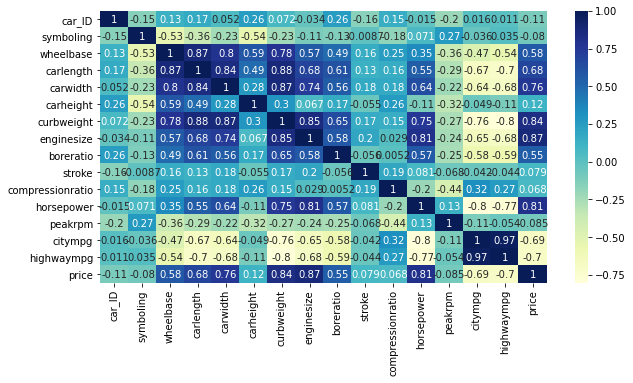

In [14]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(data=df[num_feat].corr(),cmap="YlGnBu",annot=True)
plt.show()

#### Among the numerical features carheight,carwidth,enginesize,horsepower,citympg,highwaympg affect the price of cars to a great extent.

### Feature Engineering

#### We know try to convert categorical variables by encoding them

In [19]:
cat_feat

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [21]:
df[cat_feat1].head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi


In [22]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels 
df['enginelocation']= label_encoder.fit_transform(df['enginelocation'])
  
df['enginelocation'].unique()


array([0, 1])

In [23]:
#Encoding fuel type

df['fueltype']= label_encoder.fit_transform(df['fueltype'])
  
df['fueltype'].unique()

array([1, 0])

In [24]:
#Encoding cylindernumber

df['cylindernumber']= label_encoder.fit_transform(df['cylindernumber'])
  
df['cylindernumber'].unique()

array([2, 3, 1, 4, 5, 6, 0])

In [27]:
df['aspiration']= label_encoder.fit_transform(df['cylindernumber'])
  
df['aspiration'].unique()

array([2, 3, 1, 4, 5, 6, 0], dtype=int64)

num_feat1=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_feat1)

In [29]:
df['doornumber']= label_encoder.fit_transform(df['doornumber'])
  
df['doornumber'].unique()

array([1, 0])

In [30]:
df['drivewheel']= label_encoder.fit_transform(df['drivewheel'])
  
df['drivewheel'].unique()

array([2, 1, 0])

In [31]:
df['carbody']= label_encoder.fit_transform(df['carbody'])
  
df['carbody'].unique()

array([0, 2, 3, 4, 1])

In [32]:
df['enginetype']= label_encoder.fit_transform(df['enginetype'])
  
df['enginetype'].unique()

array([0, 5, 3, 2, 6, 4, 1])

In [33]:
df['fuelsystem']= label_encoder.fit_transform(df['fuelsystem'])
  
df['fuelsystem'].unique()

array([5, 1, 4, 0, 7, 2, 3, 6])

In [34]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,doorrnumber
0,1,3,alfa-romero giulia,1,2,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,alfa-romero stelvio,1,2,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,alfa-romero Quadrifoglio,1,3,1,2,2,0,94.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,audi 100 ls,1,2,0,3,1,0,99.8,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,0
4,5,2,audi 100ls,1,1,0,3,0,0,99.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,0


## MODEL BUILDING & PREDICTIONS

In [35]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
doorrnumber         0
dtype: int64

In [36]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,doorrnumber
0,1,3,alfa-romero giulia,1,2,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,alfa-romero stelvio,1,2,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,alfa-romero Quadrifoglio,1,3,1,2,2,0,94.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,audi 100 ls,1,2,0,3,1,0,99.8,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,0
4,5,2,audi 100ls,1,1,0,3,0,0,99.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,0


In [39]:
num_feat=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_feat)

['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'doorrnumber']


In [42]:
#### Splitting out independant and dependent variables

In [41]:
x= df.loc[:,
 ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 
  'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'doorrnumber']
 ]

y=df['price']

#### Scaling our data


In [44]:
# scaling the features
from sklearn.preprocessing import scale
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = x.columns
x = pd.DataFrame(scale(x))
x.columns = cols
x.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'doorrnumber'],
      dtype='object')

In [52]:
# scaling the features
from sklearn.preprocessing import scale
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)

y = scale(y)
y[5]

0.2476100356135934

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)


In [54]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (164, 24)
X_test: (41, 24)
Y_train: (164,)
Y_test: (41,)


In [55]:
x.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,doorrnumber
0,1.743470,0.328798,-0.147475,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,...,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,1.130388
1,1.743470,0.328798,-0.147475,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,...,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,1.130388
2,0.133509,0.328798,1.112210,1.130388,-0.717207,1.213330,-0.121867,-0.708596,-0.231513,-0.190566,...,0.604046,0.869568,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,1.130388
3,0.938490,0.328798,-0.147475,-0.884652,0.449677,-0.589081,-0.121867,0.173698,0.207256,0.136542,...,-0.431076,0.869568,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,-0.884652
4,0.938490,0.328798,-1.407161,-0.884652,0.449677,-2.391492,-0.121867,0.107110,0.207256,0.230001,...,0.218885,0.869568,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,-0.884652


## Decision Tree

In [58]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [59]:
y_pred=dtree.predict(x_test)

In [60]:
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))


0.791821403087451


### So the model shows an accuracy of 79.18%

In [63]:
y_pred

array([ 0.08448493,  1.09686443,  0.07130944, -0.29258503,  2.5878279 ,
       -0.38042162, -1.01409991,  0.55114821, -0.63226169,  1.17303131,
        0.45779046, -0.4126702 , -0.79789641,  0.07319165,  4.03085767,
        0.30282161, -0.55609481,  0.45465344,  0.02739114, -0.03923919,
       -0.75059013,  0.45779046, -0.45646302,  0.34146971,  0.70812476,
        0.6115045 , -0.55609481, -0.80655459, -0.37414758,  0.31035046,
       -0.76276177, -0.50427122, -0.90116715,  0.02739114,  1.54031376,
        1.54031376,  0.55114821,  0.30282161, -0.25318404, -0.96679363,
       -0.4126702 ])

In [64]:
df_DecisionTree = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_DecisionTree.head()

,Actual,Predicted
0,-0.424340,0.084485
1,0.611505,1.096864
2,-0.311407,0.071309
3,-0.179652,-0.292585
4,2.851338,2.587828


In [110]:
### Model score

dtree.score(x_test,y_pred)

1.0

## Random Forest

In [65]:
RForest=RandomForestRegressor()
RForest.fit(x_train,y_train)

RandomForestRegressor()

In [66]:
r_pred=RForest.predict(x_test)

In [67]:
print(r2_score(y_true=y_test, y_pred=r_pred))


0.8944858281343966


### Our model shows an accuracy of 89.44%

In [68]:
r_pred

array([-0.3314866 ,  0.70015233, -0.31902133, -0.19444771,  2.92302238,
       -0.36893761, -0.72067612,  0.21545933, -0.63104891,  0.65582057,
       -0.07115524, -0.3838598 , -0.68544926,  0.17469688,  2.77055436,
        0.69975079, -0.46421899,  0.33240372, -0.05090012,  0.2975809 ,
       -0.74266714,  0.20248838, -0.41522122,  0.42565649,  0.66605103,
        0.58981702, -0.47664536, -0.61748443, -0.43575491,  0.73525665,
       -0.74537452, -0.7011444 , -0.90859436, -0.04334994,  1.74909005,
        1.53054131,  0.16638503,  0.71143933, -0.37498328, -0.93077687,
       -0.37143719])

In [69]:
df_RandomForest = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
df_RandomForest.head()

,Actual,Predicted
0,-0.424340,-0.331487
1,0.611505,0.700152
2,-0.311407,-0.319021
3,-0.179652,-0.194448
4,2.851338,2.923022


In [112]:
## Model Score
RForest.score(x_test,r_pred)

0.9983049607247159

In [70]:
print(r_pred.shape)
print('\n')
print(y_test.shape)

(41,)


(41,)


## METRICS : DECISION TREE VS RANDOM FOREST

In [71]:
#FOR DECISION TREE METRICS
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)   
r2 = metrics.r2_score(y_test,y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.27058415128331975
MSE: 0.16941172254654008
RMSE: 0.4115965531276229
R-Squared: 0.791821403087451


In [72]:
#For Random Forest Metrics
r_mae = metrics.mean_absolute_error(y_test, r_pred)
r_mse = metrics.mean_squared_error(y_test, r_pred)
r_rmse = np.sqrt(mse)   
r_r2 = metrics.r2_score(y_test,r_pred)

print("Results of sklearn.metrics:")
print("MAE:",r_mae)
print("MSE:", r_mse)
print("RMSE:",r_rmse)
print("R-Squared:", r_r2)


Results of sklearn.metrics:
MAE: 0.2172533291253266
MSE: 0.08586539574158322
RMSE: 0.4115965531276229
R-Squared: 0.8944858281343966


## Thus we can say comparing the metrics that Random Forest is a better model to predict car prices compared to Decision Trees.

### Now we try to see whether the accuracy increases due to dropping of variables

In [73]:
x.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'doorrnumber'],
      dtype='object')

In [76]:
x=df.loc[:,['symboling', 'fueltype', 'aspiration', 'doornumber',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'doorrnumber']]

y=df['price']

#### Decision Tree

In [77]:
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [78]:
pred=dtree.predict(x_test)

In [79]:
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=pred))


0.7686537118710899



#### Random forest

In [80]:
RForest=RandomForestRegressor()
RForest.fit(x_train,y_train)

RandomForestRegressor()

In [81]:
r_pred=RForest.predict(x_test)

In [82]:
print(r2_score(y_true=y_test, y_pred=r_pred))

0.889319229961173


### WE observe that after dropping the variables the r2 score value decreases for random forest as well as decision trees

## A new Perspective

#### We did our model through label encoding , now we try to do through dummification

In [83]:
df1=pd.read_csv("CarPrice.csv")

In [84]:
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Dummification


In [85]:
cat_feat=[feature for feature in df1.columns if df1[feature].dtype=='O']
print(cat_feat)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [86]:
df1=pd.get_dummies(df1, columns= ["drivewheel"], drop_first=True)

In [87]:
df1=pd.get_dummies(df1, columns= ["doornumber"], drop_first=True)

In [88]:
df1=pd.get_dummies(df1, columns= ["fueltype"], drop_first=True)

In [89]:
df1=pd.get_dummies(df1, columns= ["carbody"], drop_first=True)

In [90]:
df1=pd.get_dummies(df1, columns= ["enginelocation"], drop_first=True)

In [91]:
df1=pd.get_dummies(df1, columns= ["enginetype"], drop_first=True)

In [92]:
df1=pd.get_dummies(df1, columns= ["cylindernumber"], drop_first=True)

In [93]:
df1=pd.get_dummies(df1, columns= ["fuelsystem"], drop_first=True)

In [94]:
df1=pd.get_dummies(df1, columns= ["aspiration"], drop_first=True)

In [96]:
x=df1.drop("price", axis=1)
y=df1["price"]

In [97]:
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [98]:
y_pred=dtree.predict(x_test)

In [99]:
print(r2_score(y_true=y_test, y_pred=y_pred))


0.808994365992872


In [100]:
RForest=RandomForestRegressor()
RForest.fit(x_train,y_train)

RandomForestRegressor()

In [101]:
R_pred=RForest.predict(x_test)

In [102]:
print(r2_score(y_true=y_test, y_pred=R_pred))


0.8815883341498512


1.0

#### So we see that when we do dummification of categical variables instead of label encoding we see that although the r squared value of decsiion tree improves but random forest accuracy falls

#### Plotting the error terms to understand the distribution.

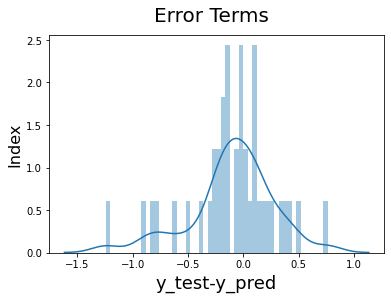

In [107]:
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

#### SUMMARY

# So this is how you can train a machine learning model for the task of predicting car prices by using the Python programming language
1. We observe that Random Forest is a better way to train oyur model as it gives better accuracy
2. We observe that dropping of variables doesnt cause any significant improvement in our model
3. The error term is distributed with its mean at 0.
4. We also observe that label encoding gives a better accuracy than dummification in case of random forest